# Linear Regression with Pytorch

In [1]:
#Import packages
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

## Let's MNIST train dataset

In [2]:
# is a dataset with images with digits from 1 to 9
# create  our training dataset
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

100.1%

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


113.5%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


100.4%

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


180.4%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [3]:
len(train_dataset)

60000

In [5]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
#The first element in the dataset is a tuple containing the image and the label

type(train_dataset[0])

tuple

In [11]:
#Input matrix
train_dataset[0][0].size()  # The first element in the tuple is an image matrix

torch.Size([1, 28, 28])

In [15]:
#label
train_dataset[0][1]  #label

5

## Let's diplay MNIST

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
#convert to numpy
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [46]:
show_image = train_dataset[0][0].numpy().reshape(28, 28)

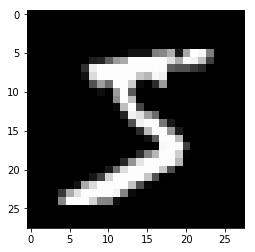

In [47]:
plt.imshow(show_image, cmap='gray')

In [51]:
train_dataset[0][1] # the label of zero is five

5

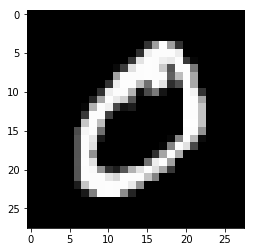

In [58]:
show_image = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(show_image, cmap='gray')

In [54]:
train_dataset[1][1] #The label of one is 0

0

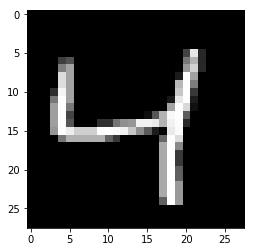

In [60]:
plt.imshow(train_dataset[2][0].numpy().reshape(28, 28), cmap='gray')

In [55]:
train_dataset[2][1] #The label of 2 is 4

4

## Let's MNIST test dataset
#### To evaluate the model performance to show our algorithm works beyong the data we have trained on (out of sample)

In [61]:
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

In [62]:
len(test_dataset)

10000

In [63]:
type(test_dataset)

torchvision.datasets.mnist.MNIST

In [64]:
type(test_dataset[0])  # The first element in the test dataset is a tuple

tuple

In [66]:
#image matrix
test_dataset[0][0].size()  # The first element in the tuple is an image matrix

torch.Size([1, 28, 28])

show_image = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_image, cmap='gray')

In [70]:
#label
test_dataset[0][1] # The second element in the tuple is an image matrix

7

## Make the dataset iterable

In [71]:
len(train_dataset)

60000

In [72]:
batch_size = 100
n_iters = 3000

In [73]:
num_epochs = n_iters/(len(train_dataset)/batch_size)

In [77]:
num_epochs = int(num_epochs)
num_epochs

5

### Let's create and iterable Object : Training Dataset

In [81]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle=True) 

#### Let's check iterability

In [82]:
import collections
isinstance(train_loader, collections.Iterable)

True

### Let's create and iterable Object : Testing Dataset

In [85]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size = batch_size,
                                           shuffle=False) 

#### Let's check iterability

In [86]:
import collections
isinstance(test_loader, collections.Iterable)

True

### our maim aim is
## *to Iterate Through Dataset*

In [87]:
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]
for i in lst:
    print(i.shape)

(28, 28)
(28, 28)



















## Building the model

In [94]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out






## instantiate Model Class

In [95]:
# size of image
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [96]:
input_dim = 28*28
output_dim= 10

In [97]:
model = LogisticRegressionModel(input_dim, output_dim)

## Instantiate the loss Class
### For the linear regression we have used MSE but the logistic regression we will use Cross entrpy loss

In [98]:
criterion = nn.CrossEntropyLoss()

#### * We will use softmax function (logistic softmax function since we are dealing with multiclass and since we have probabilities)
#### * We compute cross entropy

## Instantiate Optimizer Class

In [100]:
learning_rate = 0.001
# the optimizer is to update our parameters for every iteration so that we get a better model to do our 
# predictions on differents images
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

## Parameters in Depth

In [106]:
print(len(list(model.parameters())))
print(model.parameters)
print(list(model.parameters())[0].size()) # our parameter alpha ~784 since our input x after shuffle x~784
print(list(model.parameters())[1].size()) # our parameter b (bias~10) since our output ~10 classes

2
<bound method Module.parameters of LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)>
torch.Size([10, 784])
torch.Size([10])


dot product then addition (10,784)*(784,1)+(10,1)=(10,1)

# Train Model

In [110]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # load image as Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        #Clear gradient w.r.t parameters
        optimizer.zero_grad()
        
        # forward pass to get output/ logits
        outputs = model(images)
        
        # Calculate loss: sofmax-->cross entropy loss
        loss = criterion(outputs, labels)
        
        #Getting gradient w.r.t parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 250 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            #iterate through test dataset
            for images, labels in test_loader:
                
                # Load image to a torch variable
                images = Variable(images.view(-1, 28*28))
                
                # forward pass only to get logits/output
                outputs = model(images)
                
                # get prediction from the mazimum value
                _, predicted = torch.max(outputs.data, 1)
                
                # total number of labels
                total += labels.size(0)
                
                #total correct predictions
                correct += (predicted==labels).sum()
            
            accuracy = 100 * correct / total
            
            # print loss
            print('iteration: {}, Loss: {}, Accuracy: {}'.format(iter, loss.data, accuracy) )

iteration: 250, Loss: 1.044668436050415, Accuracy: 84
iteration: 500, Loss: 0.904212236404419, Accuracy: 84
iteration: 750, Loss: 0.9522091150283813, Accuracy: 84
iteration: 1000, Loss: 0.9233389496803284, Accuracy: 84
iteration: 1250, Loss: 1.0169343948364258, Accuracy: 85
iteration: 1500, Loss: 0.8729755282402039, Accuracy: 85
iteration: 1750, Loss: 0.7346003651618958, Accuracy: 85
iteration: 2000, Loss: 0.7244558930397034, Accuracy: 85
iteration: 2250, Loss: 0.7512142658233643, Accuracy: 85
iteration: 2500, Loss: 0.7757802605628967, Accuracy: 85
iteration: 2750, Loss: 0.7077282071113586, Accuracy: 85
iteration: 3000, Loss: 0.6956419944763184, Accuracy: 85
